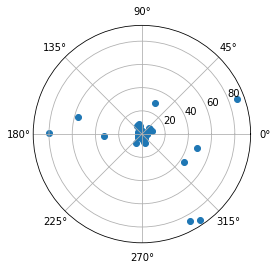

In [9]:
import matplotlib.pyplot as plt
import re
import numpy as np
import math

rpm = 33
ms_per_poll = 29 
time_per_rotation = (60 / rpm) * 1000
polls_per_rotation = time_per_rotation/ms_per_poll
upper_bound = 150 

#distance_from_object = 21 * 10

def cart2pol(x, y):
    rho = np.sqrt(x**2 + y**2)
    phi = np.arctan2(y, x)
    return(rho, math.degrees(phi))

f = open("box.txt", "r")

testdata = "Distance: 188.79 Time: 429"

time = []
distance = []

for d in f.readlines():
    x = re.findall(r"[-+]?(?:\d*\.\d+|\d+)", d)
    distance.append(float(x[0]))
    time.append(float(x[1]))

filtered_time = []
filtered_distance = []

for i in range(0, len(distance)):
    if distance[i] < upper_bound:
        filtered_distance.append(distance[i])
        filtered_time.append(time[i])

ntime = np.asarray(filtered_time)
ndistance = np.asarray(filtered_distance)

theta = []
r = []

for z in range(0, len(filtered_time)):
    polar = cart2pol(ntime[z], ndistance[z])
    theta.append(polar[0])
    r.append(polar[1])


fig, ax = plt.subplots(subplot_kw={'projection': 'polar'})
plt.scatter(theta, r)
#plt.scatter(ntime, ndistance)
plt.show()
